# Gemini AI: Extracción de datos estructurados con Gemini Pro Vision y Pydantic

Este repositorio proporciona una guía detallada sobre cómo utilizar Gemini AI en combinación con Pydantic para la extracción de datos estructurados. A través de ejemplos prácticos, se demuestra cómo aplicar estas tecnologías en sectores como el retail para descubrir tendencias de consumo y extraer información crucial.

**CONTENIDO**

- Introducción: Visión general de la evolución de la inteligencia artificial generativa y la aplicación de Gemini AI en la extracción de datos.
- Background: Información sobre las capacidades de Gemini AI y Pydantic en el procesamiento de datos multimodal.
- Hands-On: Pasos detallados para realizar búsquedas en tiempo real con Google Search, web scraping, y extracción de información estructurada utilizando Gemini Pro Vision.
- Conclusión: Reflexiones sobre el potencial de estas tecnologías para transformar la manera en que capturamos y analizamos datos.

**CÓMO EMPEZAR**

- Configuración Inicial: Sigue las instrucciones para autenticarte en Google Cloud y configurar Vertex AI.
- Web Scraping y Procesamiento de Datos: Aprende a extraer datos de páginas web y a procesarlos con Gemini AI y Pydantic.
- Análisis de Datos Estructurados: Explora cómo utilizar estos datos para insights y aplicaciones prácticas en diversos sectores.

**CONTRIBUIR**

Si tienes ideas, preguntas o deseas discutir sobre las posibilidades de la IA y cómo trabajar juntos para construir soluciones basadas en IAG, no dudes en contactarme:

- GitHub: https://github.com/albertgilopez
- LinkedIn: Albert Gil López: https://www.linkedin.com/in/albertgilopez/
- Inteligencia Artificial Generativa (IAG) en español: https://www.codigollm.es/

In [1]:
import sys

# Autenticación adicional para Google Colab
if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()

# @param {type:"string"}
PROJECT_ID = "tu-project-id"  # Sustituye con tu Project ID
# @param {type:"string"}
LOCATION = "tu-region-id"  # Elige tu región

if "google.colab" in sys.modules:
    import vertexai
    vertexai.init(project=PROJECT_ID, location=LOCATION)

# import os
# print(os.environ)

import vertexai

from google.oauth2 import service_account
CREDENTIALS = service_account.Credentials.from_service_account_file("/Users/albertgilopez/Downloads/personally.ai-shopper/Notebooks/vertex-ai-407803-ac70f5ed7cd1.json")

vertexai.init(project=PROJECT_ID, credentials=CREDENTIALS)


In [3]:
# !pip install requests html2text beautifulsoup4

In [4]:
import requests
from bs4 import BeautifulSoup
import html2text

def scrape_website(url):
    try:
        # Send an HTTP request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            return html2text.html2text(response.text)

        else:
            print(f"Failed to retrieve content. Status code: {response.status_code}")

    except Exception as e:
        print(f"An error occurred: {e}")

In [8]:
url = "https://www.tiendeo.com/Tiendas/cerdanyola-del-valles/juguetes-y-bebes"

google_search_content = scrape_website(url)
google_search_content

'[![Tiendeo official website](https://static-webapp.tiendeo.com/assets/tiendeo-\nwhite.svg)](/cerdanyola-del-valles)\n\nCancelar\n\nBuscar\n\nMi Tiendeo\n\n  * [Destacados](/cerdanyola-del-valles)\n  * [Hiper-Supermercados](/cerdanyola-del-valles/supermercados)\n  * [Hogar y Muebles](/cerdanyola-del-valles/hogar-y-muebles)\n  * [Jardín y Bricolaje](/cerdanyola-del-valles/jardin-y-bricolaje)\n  * [Navidad](/cerdanyola-del-valles/navidad)\n  * [Ropa, Zapatos y Complementos](/cerdanyola-del-valles/ropa-zapatos-y-complementos)\n  * [Informática y Electrónica](/cerdanyola-del-valles/informatica-y-electronica)\n  * [Juguetes y Bebés](/cerdanyola-del-valles/juguetes-y-bebes)\n  * [Coches, Motos y Recambios](/cerdanyola-del-valles/coches-motos-y-recambios)\n  * [Perfumerías y Belleza](/cerdanyola-del-valles/perfumerias-y-belleza)\n  * [Viajes](/cerdanyola-del-valles/viajes)\n  * [Restauración](/cerdanyola-del-valles/restauracion)\n  * [Salud y Ópticas](/cerdanyola-del-valles/salud)\n  * [Ocio]

In [15]:
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Part

def google_search_formated_response(content, max_output_tokens=7815):
  model = GenerativeModel("gemini-pro")

  schema = """
  {
    "places": [
      {
        "name": "",
        "rating": <<float>>,
        "price": "",
        "category": "",
        "address": "",
        "city": "",
        "state": "",
        "zip": "",
        "country": "",
        "phone": "",
        "website": ""
      }
    ]
  }
  """

  responses = model.generate_content(
    f"""Format the below response to the following JSON schema, only 1 store.

    Here's the content:

    {content}

    """,
        generation_config={
            "max_output_tokens": max_output_tokens,
            "temperature": 0,
            "top_p": 1
        },
      stream=True,
      )

  formated_response = []

  for response in responses:
      text = response.candidates[0].content.parts[0].text
      print(text)
      formated_response.append(text)

  return formated_response

formated_response = google_search_formated_response(google_search_content)

```json
{
  "stores": [
    {
      "
name": "Juguettos",
      "address": "Avenida
 Catalunya, 39",
      "city": "Cerdanyola del Vall\u00e8s",
      "state": null
,
      "zip": "08290",
      "country": "Spain",
      "phone": null,
      "hours
": "Closed",
      "distance": "0.53 km",
      "website": "https://www.tiendeo.com/Tiendas/cerdanyola-del-valles/juguet
tos-avenida-catalunya/199104",
      "logo": "https://static1.tiendeo.com/upload_negocio/negocio_1699/logo2.
png"
    }
  ]
}
```


In [16]:
formated_response

['```json\n{\n  "stores": [\n    {\n      "',
 'name": "Juguettos",\n      "address": "Avenida',
 ' Catalunya, 39",\n      "city": "Cerdanyola del Vall\\u00e8s",\n      "state": null',
 ',\n      "zip": "08290",\n      "country": "Spain",\n      "phone": null,\n      "hours',
 '": "Closed",\n      "distance": "0.53 km",\n      "website": "https://www.tiendeo.com/Tiendas/cerdanyola-del-valles/juguet',
 'tos-avenida-catalunya/199104",\n      "logo": "https://static1.tiendeo.com/upload_negocio/negocio_1699/logo2.',
 'png"\n    }\n  ]\n}\n```']

In [17]:
# !pip install --upgrade selenium
# !pip install webdriver_manager

In [18]:
import logging
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Configuración del logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def click_zoom_in(driver, times):
    try:
        zoom_in_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.ID, "widget-zoom-in"))
        )
        for _ in range(times):
            zoom_in_button.click()
            time.sleep(1)  # Espera breve entre cada clic
        time.sleep(5)  # Espera adicional para que el mapa se actualice después del último clic
    except Exception as e:
        logger.warning(f"No se pudo realizar el zoom: {e}")

def accept_cookies(driver):
    try:
        logger.info("Buscando el botón de aceptar cookies")
        accept_cookies_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//span[contains(text(), 'Aceptar todo')]"))
        )
        accept_cookies_button.click()
        logger.info("Cookies aceptadas")
    except Exception as e:
        logger.warning(f"No se encontró el botón de aceptar cookies: {e}")

def capture_webpage_screenshot(url, path_to_save_image):
    try:
        logger.info("Iniciando el servicio de ChromeDriver")
        service = Service(ChromeDriverManager().install())

        logger.info("Creando una instancia del driver de Chrome")
        driver = webdriver.Chrome(service=service)
        
        logger.info(f"Accediendo a la URL: {url}")
        driver.get(url)

        # Intenta aceptar las cookies
        accept_cookies(driver)

        # Realizar zoom en la página
        click_zoom_in(driver, 3)  # Ajusta este número según sea necesario

        driver.set_window_size(1920, 1080)  # Ajusta según necesites

        logger.info(f"Guardando captura de pantalla en: {path_to_save_image}")
        driver.save_screenshot(path_to_save_image)
    except Exception as e:
        logger.error(f"Se produjo un error: {e}")
    finally:
        logger.info("Cerrando el driver de Chrome")
        driver.quit()

# URL de la página y ruta donde guardar la imagen
url = "https://www.google.com/maps/search/juguetes+en+Cerdanyola+del+Vall%C3%A8s/@41.4930154,2.1225403,14.59z?entry=ttu"
path_to_save_image = "tu-ruta-para-guardar-la-imagen"
capture_webpage_screenshot(url, path_to_save_image)

INFO:__main__:Iniciando el servicio de ChromeDriver
INFO:WDM:====== WebDriver manager ======
INFO:WDM:Get LATEST chromedriver version for google-chrome
INFO:WDM:Get LATEST chromedriver version for google-chrome
INFO:WDM:Get LATEST chromedriver version for google-chrome
INFO:WDM:WebDriver version 120.0.6099.109 selected
INFO:WDM:Modern chrome version https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/120.0.6099.109/mac-x64/chromedriver-mac-x64.zip
INFO:WDM:About to download new driver from https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/120.0.6099.109/mac-x64/chromedriver-mac-x64.zip
INFO:WDM:Driver downloading response is 200
INFO:WDM:Get LATEST chromedriver version for google-chrome
INFO:WDM:Driver has been saved in cache [/Users/albertgilopez/.wdm/drivers/chromedriver/mac64/120.0.6099.109]
INFO:__main__:Creando una instancia del driver de Chrome
INFO:__main__:Accediendo a la URL: https://www.google.com/maps/search/juguetes+en+Cerdanyola+del+Vall%C3%A8s/@41.493015

In [20]:
# 2nd Part: Gemini + Pydantic for Structured Output Parsing from an Image
# Leveraging Gemini for the image reasoning

# Use Pydantic program to generate structured output from the image reasoning results of Gemini

import os
GOOGLE_API_KEY = "tu-api-key"  # add your GOOGLE API key here
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

import google.generativeai as genai

genai.configure(
    api_key=GOOGLE_API_KEY,
    client_options={"api_endpoint": "generativelanguage.googleapis.com"},
)

In [21]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-pro
models/gemini-pro-vision


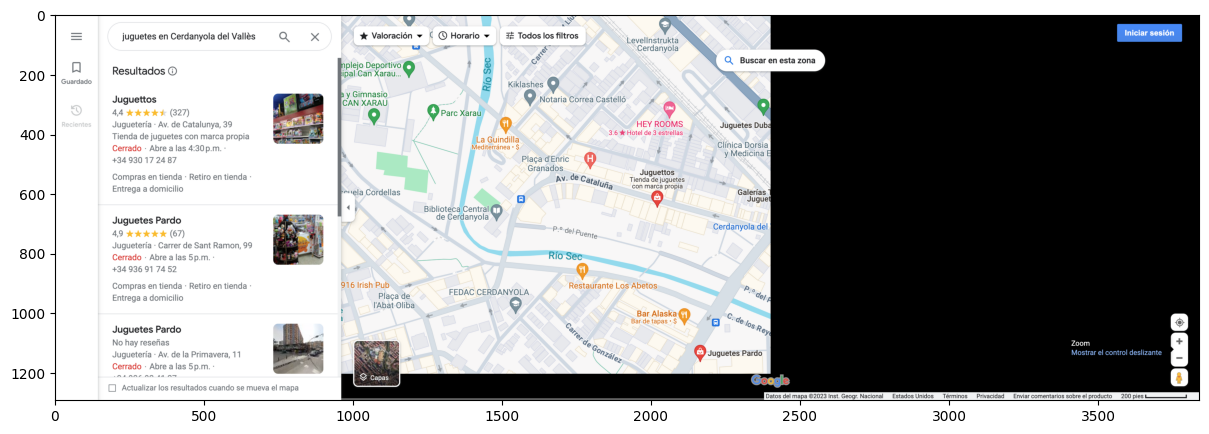

In [24]:
# Define the Pydantic Class for the Structured Parser
from pydantic import BaseModel
from PIL import Image
import matplotlib.pyplot as plt

# Clase principal que corresponde al esquema
class GoogleLocal(BaseModel):
    name: str
    category: str
    address: str
    hours: str
    rating: float
    price: str
    description: str


google_image_url = "ruta-a-la-imagen-que-acabas-de-capturar"
image = Image.open(google_image_url).convert("RGB")

plt.figure(figsize=(16, 5))
plt.imshow(image)

In [25]:
# Call the Pydantic Program and Generate Structured Output
from llama_index.multi_modal_llms import GeminiMultiModal
from llama_index.program import MultiModalLLMCompletionProgram
from llama_index.output_parsers import PydanticOutputParser

prompt_template_str = """\
    can you summarize what is in the image\
    and return the answer with json format \
"""


def pydantic_gemini(
    model_name, output_class, image_documents, prompt_template_str
):
    gemini_llm = GeminiMultiModal(
        api_key=GOOGLE_API_KEY, model_name=model_name
    )

    llm_program = MultiModalLLMCompletionProgram.from_defaults(
        output_parser=PydanticOutputParser(output_class),
        image_documents=image_documents,
        prompt_template_str=prompt_template_str,
        multi_modal_llm=gemini_llm,
        verbose=True,
    )

    response = llm_program()
    return response

In [28]:
from llama_index import SimpleDirectoryReader

google_image_documents = SimpleDirectoryReader(
    "ruta-al-directorio-de-imagenes"
).load_data()

results = []
for img_doc in google_image_documents:
    pydantic_response = pydantic_gemini(
        "models/gemini-pro-vision",
        GoogleLocal,
        [img_doc],
        prompt_template_str,
    )
    # only output the results for miami for example along with image
    if "image1" in img_doc.image_path:
        for r in pydantic_response:
            print(r)
    results.append(pydantic_response)

    print(results)

('name', 'Juguettos Pardo')
('category', 'Toy Store')
('address', 'Carrer de Sant Ramon, 39')
('hours', 'Closed ⋅ Opens 4:30 PM')
('rating', 4.9)
('price', '$$')
('description', 'Compra en tienda - Retiro en tienda - Entrega a domicilio')
[GoogleLocal(name='Juguettos Pardo', category='Toy Store', address='Carrer de Sant Ramon, 39', hours='Closed ⋅ Opens 4:30 PM', rating=4.9, price='$$', description='Compra en tienda - Retiro en tienda - Entrega a domicilio')]


In [29]:
system = "You are a helpful assistant"
human = f"""Estoy buscando un regalo para mi madre. Llegaré a medio día hay algun sitio cerca para comer?
          {results}
           """

In [30]:
from langchain.chat_models import ChatVertexAI
from langchain.prompts import ChatPromptTemplate

In [31]:
prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

chat = ChatVertexAI()

chain = prompt | chat
chain.invoke({})

AIMessage(content=' Claro, aquí tienes algunas opciones de restaurantes cercanos a Juguettos Pardo:\n\n* **La Taberna del Zurdo:** Este restaurante español está a solo 5 minutos a pie de Juguettos Pardo. Sirven una variedad de platos tradicionales españoles, como paella, tapas y sangría.\n* **La Taverna del Clínic:** Este restaurante italiano está a 10 minutos a pie de Juguettos Pardo. Sirven una variedad de platos italianos, como pasta, pizza y risotto.\n* **El Racó del Mariner:** Este restaurante de mariscos está a 15 minutos a pie de J')